Let's look at relationship between PM2.5 and traffic flow. The data are real, but the location "1b14" is undisclosed.

In [2]:
from lib import airqual_read
from lib import constants
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

location = "1b14"

The traffic data that we have is 1-hourly aggregated data.

We'll read in the air quality data, and then downsample so that it is also 1-hourly average (non-overlapping window).

In [5]:
# Several air quality sensors are placed at this location.
# We retrieve a list of dataframes.
df_list = airqual_read.hourly_airqual(location)

# Let's pick out the second sensor at this location
df = df_list[1]

# Read in the traffic flow data for this location and append to air qual dataframe
traffic_df = pd.read_csv(constants.TRAFFIC_PATH / (location + "_traffic.csv"),index_col=0)
df = pd.concat([df,traffic_df],axis=1)

# There are two motorways near this location. We'll aggregate the traffic flows.
df["M_count"] = df["M0_count"] + df["M1_count"]

At this point, our dataframe is full of various readings of temperature, humidity, noise, CO2, particulate matter, etc.

In [7]:
print(df)

          TEMP        HUM       BATT      LIGHT    NOISE_A      PRESS  \
0    16.264059  78.628954  99.928870   0.000000  35.952594  99.764686   
1    16.346485  79.248243  99.903766   0.000000  35.865021  99.771841   
2    16.500750  80.312111  99.925000   0.000000  34.076295  99.404556   
3    16.421972  80.741444  99.916667   0.000000  34.125278  99.400889   
4    16.395894  80.813212  99.932961   0.000000  34.196369  99.416229   
..         ...        ...        ...        ...        ...        ...   
163  15.943917  76.093222  99.961111   0.000000  29.808917  99.469083   
164  15.865487  76.350251  99.944290   0.000000  29.331838  99.461393   
165  15.912694  77.273917  99.947222  21.419444  31.211778  99.448139   
166  16.070724  78.309916  99.935933   5.880223  33.647437  99.437437   
167  16.189038  77.753180  99.907950   0.000000  36.959079  99.749289   

     CCS811_VOCS  CCS811_ECO2    SCD30_CO2  SCD30_TEMP  SCD30_HUM      PM_1  \
0    1327.418410  2039.280335  1875.799163  

We'll approach this naively and try and see which variables correlate strongly with each other. Doing this shows that PM_25 (PM 2.5) has a weak/moderate correlation of about 0.4 with total motorway traffic flow.

In [8]:
print(df.corr())

,TEMP,HUM,BATT,LIGHT,NOISE_A,PRESS,CCS811_VOCS,CCS811_ECO2,SCD30_CO2,SCD30_TEMP,SCD30_HUM,PM_1,PM_25,PM_10,day,M0_count,M1_count,M_count
TEMP,1.000000,0.348004,-0.215066,-0.048114,0.277731,-0.216997,0.192807,0.274876,0.361620,0.982783,0.380277,0.117268,0.073169,0.062629,-0.271903,-0.109794,-0.075218,-0.091142
HUM,0.348004,1.000000,0.127964,-0.219791,0.590367,-0.200685,0.784337,0.865434,0.931950,0.438683,0.996366,-0.149658,-0.176525,-0.175673,0.042550,-0.735108,-0.703678,-0.720243
BATT,-0.215066,0.127964,1.000000,0.259032,-0.035350,-0.352320,0.227877,0.241680,0.173005,-0.116293,0.118250,-0.006917,0.006553,0.005445,0.546151,-0.116389,-0.082649,-0.098218
LIGHT,-0.048114,-0.219791,0.259032,1.000000,-0.242790,-0.016363,-0.095234,-0.032832,-0.217748,-0.032856,-0.213316,0.399301,0.382452,0.381544,0.143201,0.172480,0.203348,0.190021
NOISE_A,0.277731,0.590367,-0.035350,-0.242790,1.000000,-0.094918,0.436473,0.501627,0.705279,0.344176,0.559487,-0.225660,-0.297031,-0.311816,0.013444,-0.666472,-0.659078,-0.664599
PRESS,-0.216997,-0.200685,-0.352320,-0.016363,-0.094918,1.000000,-0.141142,-0.144661,-0.183571,-0.254121,-0.202180,0.086579,0.104803,0.107635,-0.429404,-0.020202,-0.032995,-0.027303
CCS811_VOCS,0.192807,0.784337,0.227877,-0.095234,0.436473,-0.141142,1.000000,0.935007,0.805563,0.277245,0.780386,-0.126319,-0.132555,-0.123778,0.099615,-0.494551,-0.463696,-0.479210
CCS811_ECO2,0.274876,0.865434,0.241680,-0.032832,0.501627,-0.144661,0.935007,1.000000,0.890838,0.364789,0.865041,-0.072257,-0.079218,-0.071717,0.075909,-0.609968,-0.564689,-0.587075
SCD30_CO2,0.361620,0.931950,0.173005,-0.217748,0.705279,-0.183571,0.805563,0.890838,1.000000,0.450857,0.921047,-0.207647,-0.252529,-0.258611,0.019399,-0.791315,-0.757746,-0.775459
SCD30_TEMP,0.982783,0.438683,-0.116293,-0.032856,0.344176,-0.254121,0.277245,0.364789,0.450857,1.000000,0.464199,0.075309,0.036651,0.027745,-0.242700,-0.187658,-0.147397,-0.166136


Plot the time series on the same graph:

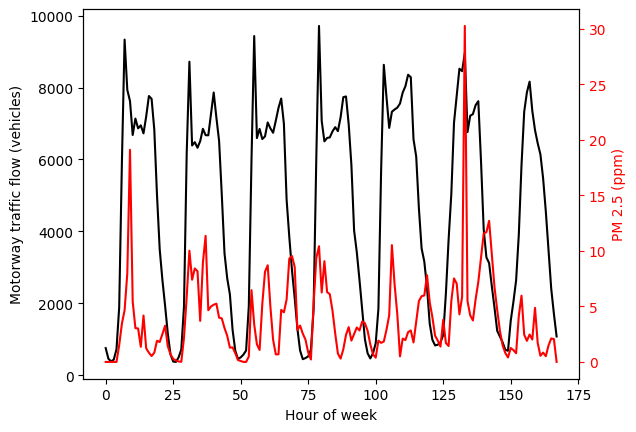

In [10]:
# Let's plot the time series
fig,ax = plt.subplots()
df.plot(y="M_count",ax=ax,style="k-")
ax.set_xlabel("Hour of week")
ax.set_ylabel("Motorway traffic flow (vehicles)")
ax1=ax.twinx()
df.plot(y="PM_25",ax=ax1, style="r-")
ax1.set_ylabel("PM 2.5 (ppm)")
ax1.yaxis.label.set_color("red")
ax1.tick_params(axis='y',colors="red")
ax.legend().remove()
ax1.legend().remove()

And scatter PM 2.5 against motorway traffic flow:

<AxesSubplot: xlabel='Motorway traffic flow (vehicles)', ylabel='PM 2.5 (ppm)'>

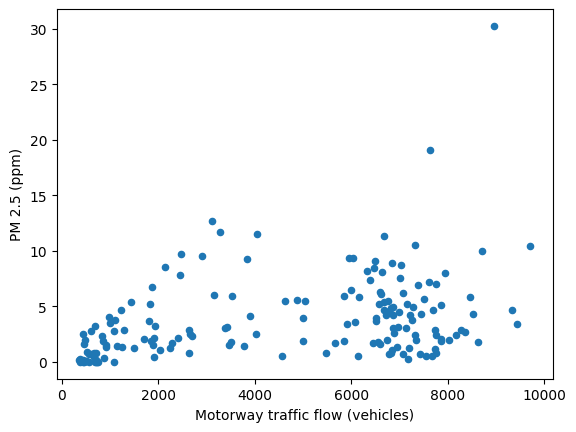

In [11]:
df.plot.scatter(x="M_count",y="PM_25", ylabel="PM 2.5 (ppm)",xlabel="Motorway traffic flow (vehicles)")

Finally, calculate the average PM 2.5 levels and compare them against WHO guidelines.

In [12]:
meanval = df["PM_25"].mean() * 1000
print(f"Average PM 2.5 is {np.rint(meanval)} ug/m3. WHO guidelines say aim for annual average of 5 ug/m3")

Average PM 2.5 is 3879.0 ug/m3. WHO guidelines say aim for average of 5 ug/m3
